In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Pre-Process Data

In [2]:
# Constants
numRows = 10000

In [3]:
# Read in file
df = pd.read_csv("../data/train.csv",nrows=numRows)

In [4]:
# Remove some Data 
# where lat/long == 0
df = df.drop(df.index[df['pickup_longitude'] == 0])
df = df.drop(df.index[df['dropoff_longitude'] == 0])

# extreme outliers
df = df.drop(df.index[df['pickup_longitude'] > -50])
df = df.drop(df.index[df['pickup_latitude'] > 100])
df = df.drop(df.index[df['dropoff_longitude'] > -20])
df = df.drop(df.index[df['dropoff_latitude'] < 30])

In [5]:
# Pre-process, set X and y
fare_amount = df["fare_amount"]
del df["key"]
del df["fare_amount"]
df["pickup_datetime"] = df["pickup_datetime"].apply(lambda d:int(d[10:13]))
X = df
y = fare_amount

## Visualization

In [6]:
# _ = scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

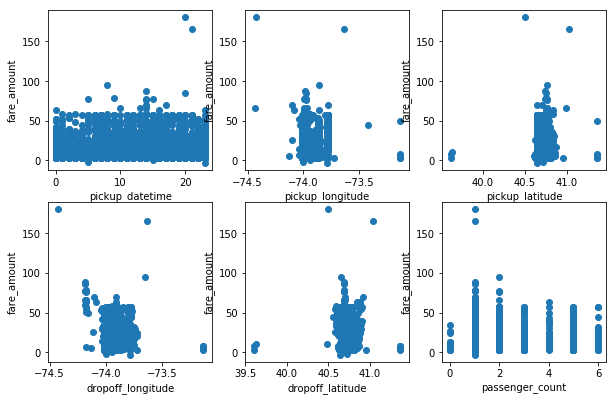

['pickup_datetime' 'pickup_longitude' 'pickup_latitude' 'dropoff_longitude'
 'dropoff_latitude' 'passenger_count']


In [7]:
col_names = df.columns.values[:]
plt.rcParams['figure.figsize'] = [10, 10]
for i,n in enumerate(col_names):
    plt.subplot(3,3,i+1)
    plt.xlabel(n)
    plt.ylabel("fare_amount")
    plt.scatter(X[n],y)
plt.show()
print(col_names)

## Linear Regression

In [8]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
# r^2 Score
print("Score: {}".format(model.score(X,y)))

Score: 0.18232963740603292


#### What if we used Manhattan distance as a feature?

In [9]:
# Take the sum of the absolute values of the differences of the coordinates.
# For example, if x=(a,b) and y=(c,d), the Manhattan distance between x and y is |a−c|+|b−d|
X['e_dist'] = abs(X['pickup_longitude']-X['dropoff_longitude'])+abs(X['pickup_latitude']-X['dropoff_latitude'])
model.fit(X,y)
print("Score: {}".format(model.score(X,y)))
X.head()

Score: 0.4966396280645905


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,e_dist
0,17,-73.844311,40.721319,-73.841610,40.712278,1,0.011742
1,16,-74.016048,40.711303,-73.979268,40.782004,1,0.107481
2,0,-73.982738,40.761270,-73.991242,40.750562,2,0.019212
3,4,-73.987130,40.733143,-73.991567,40.758092,1,0.029386
4,7,-73.968095,40.768008,-73.956655,40.783762,1,0.027194
